In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

- ### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
df = pd.read_csv('titanic_df.csv')

In [3]:
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [13]:
prepare.prep_titanic(df)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,male,22.0,1,0,7.2500,Southampton,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Queenstown,0,1,0,0
886,0,2,male,27.0,0,0,13.0000,Southampton,1,0,1,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,1,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,0,0,1


In [14]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [5]:
# dropping Unnamed column because it is useless
df.drop(columns= ['Unnamed: 0'], inplace = True)
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [6]:
# '0' means they didnt survive, '1' means that they did survive
# the baseline will be '0' because it is the most common; the mode
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
train, val, test = prepare.split_data(df, target='survived')

In [9]:
X_train = train.drop(columns= ['survived'])
y_train = train['survived']

X_val = val.drop(columns= ['survived'])
y_val = val['survived']

X_test = test.drop(columns= ['survived'])
y_test = test['survived']

In [12]:
X_train

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
474,474,3,female,22.0,0,0,9.8375,S,Third,NaN,Southampton,1
370,370,1,male,25.0,1,0,55.4417,C,First,E,Cherbourg,0
573,573,3,female,NaN,0,0,7.7500,Q,Third,NaN,Queenstown,1
110,110,1,male,47.0,0,0,52.0000,S,First,C,Southampton,1
167,167,3,female,45.0,1,4,27.9000,S,Third,NaN,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,3,male,28.5,0,0,16.1000,S,Third,NaN,Southampton,1
163,163,3,male,17.0,0,0,8.6625,S,Third,NaN,Southampton,1
770,770,3,male,24.0,0,0,9.5000,S,Third,NaN,Southampton,1
196,196,3,male,NaN,0,0,7.7500,Q,Third,NaN,Queenstown,1


In [10]:
tree1 = DecisionTreeClassifier(max_depth= 3, random_state=123)

In [11]:
tree1 = tree1.fit(X_train, y_train)

ValueError: could not convert string to float: 'female'

In [74]:
train

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,deck,alone
474,474,0,3,22.0,0,0,9.8375,Third,NaN,1
370,370,1,1,25.0,1,0,55.4417,First,E,0
573,573,1,3,NaN,0,0,7.7500,Third,NaN,1
110,110,0,1,47.0,0,0,52.0000,First,C,1
167,167,0,3,45.0,1,4,27.9000,Third,NaN,0
...,...,...,...,...,...,...,...,...,...,...
735,735,0,3,28.5,0,0,16.1000,Third,NaN,1
163,163,0,3,17.0,0,0,8.6625,Third,NaN,1
770,770,0,3,24.0,0,0,9.5000,Third,NaN,1
196,196,0,3,NaN,0,0,7.7500,Third,NaN,1


In [49]:
df['baseline'] = df.survived.value_counts().idxmax()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,0
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,0


In [50]:
(df.survived == df.baseline).mean()

0.6161616161616161

- ### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [51]:
df = prepare.prep_titanic(df)

In [80]:
df.drop(columns= ['sex', 'embark_town', 'embarked'], inplace = True)

In [81]:
df.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,deck,alone
0,0,0,3,22.0,1,0,7.2500,Third,NaN,0
1,1,1,1,38.0,1,0,71.2833,First,C,0
2,2,1,3,26.0,0,0,7.9250,Third,NaN,1
3,3,1,1,35.0,1,0,53.1000,First,C,0
4,4,0,3,35.0,0,0,8.0500,Third,NaN,1


def split_data(df, target=''):
        train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=42,
                              stratify=df[target])
        train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=42,
                             stratify=train[target])
        return train, val, test

In [82]:
def split_data(df, target=''):
        train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1349,
                              stratify=df[target])
        train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=1349,
                             stratify=train[target])
        return train, val, test
    

In [83]:
train, val, test= split_data(df, target='survived')

In [84]:
train.shape, val.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [85]:
train

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,deck,alone
474,474,0,3,22.0,0,0,9.8375,Third,NaN,1
370,370,1,1,25.0,1,0,55.4417,First,E,0
573,573,1,3,NaN,0,0,7.7500,Third,NaN,1
110,110,0,1,47.0,0,0,52.0000,First,C,1
167,167,0,3,45.0,1,4,27.9000,Third,NaN,0
...,...,...,...,...,...,...,...,...,...,...
735,735,0,3,28.5,0,0,16.1000,Third,NaN,1
163,163,0,3,17.0,0,0,8.6625,Third,NaN,1
770,770,0,3,24.0,0,0,9.5000,Third,NaN,1
196,196,0,3,NaN,0,0,7.7500,Third,NaN,1


In [86]:
df

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,deck,alone
0,0,0,3,22.0,1,0,7.2500,Third,NaN,0
1,1,1,1,38.0,1,0,71.2833,First,C,0
2,2,1,3,26.0,0,0,7.9250,Third,NaN,1
3,3,1,1,35.0,1,0,53.1000,First,C,0
4,4,0,3,35.0,0,0,8.0500,Third,NaN,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,Second,NaN,1
887,887,1,1,19.0,0,0,30.0000,First,B,1
888,888,0,3,NaN,1,2,23.4500,Third,NaN,0
889,889,1,1,26.0,0,0,30.0000,First,C,1


In [87]:
X_train = train.drop(columns= ['survived'])
y_train = train['survived']

X_val = val.drop(columns= ['survived'])
y_val = val['survived']

X_test = test.drop(columns= ['survived'])
y_test = test['survived']

In [88]:
X_train

,passenger_id,pclass,age,sibsp,parch,fare,class,deck,alone
474,474,3,22.0,0,0,9.8375,Third,NaN,1
370,370,1,25.0,1,0,55.4417,First,E,0
573,573,3,NaN,0,0,7.7500,Third,NaN,1
110,110,1,47.0,0,0,52.0000,First,C,1
167,167,3,45.0,1,4,27.9000,Third,NaN,0
...,...,...,...,...,...,...,...,...,...
735,735,3,28.5,0,0,16.1000,Third,NaN,1
163,163,3,17.0,0,0,8.6625,Third,NaN,1
770,770,3,24.0,0,0,9.5000,Third,NaN,1
196,196,3,NaN,0,0,7.7500,Third,NaN,1


In [91]:
seed = 42
tree1 = DecisionTreeClassifier(max_depth = 3, random_state= 42)

In [92]:
tree1.fit(X_train, y_train)

ValueError: could not convert string to float: 'Third'

In [61]:
tree1.score(X_train, y_train)

0.8269617706237424

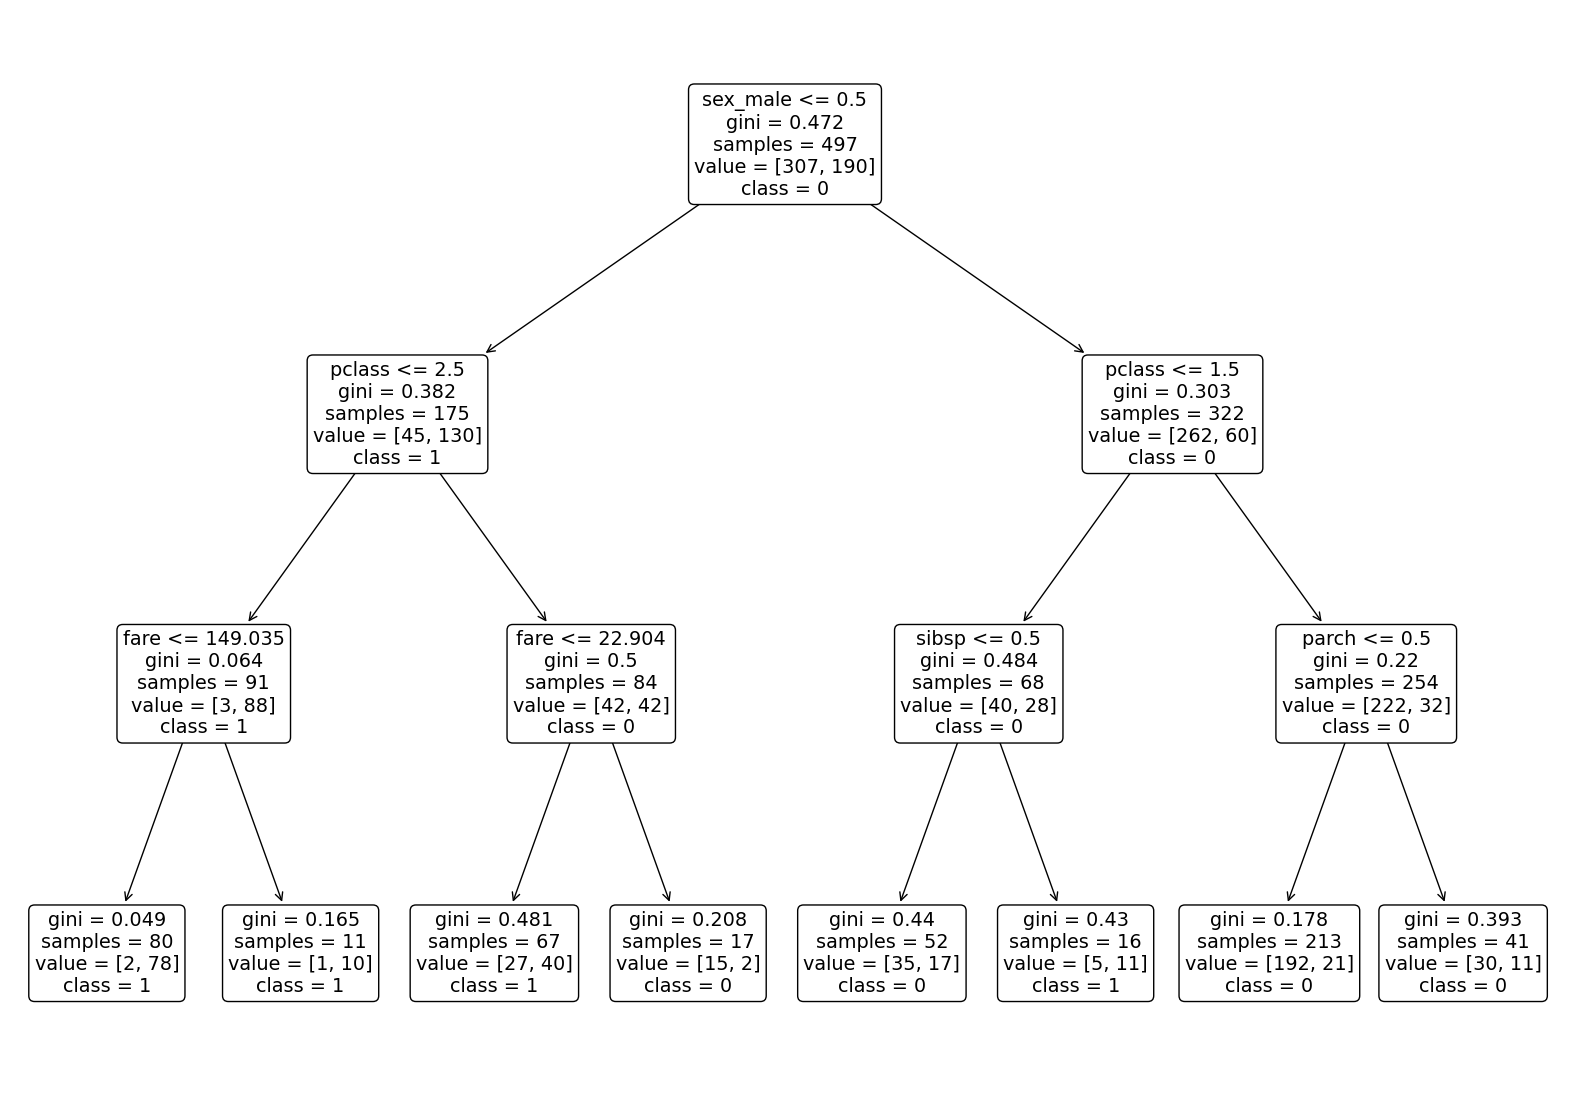

In [62]:
plt.figure(figsize=(20, 14))
plot_tree(tree1, feature_names= X_train.columns, class_names= np.array(tree1.classes_).astype('str').tolist(), rounded=True)
plt.show()

- ### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [37]:
tree1.score(X_train, y_train)

ValueError: could not convert string to float: 'S'

In [64]:
y_preds = pd.DataFrame({
    'y_act': y_train,
    'baseline': 0,
    'model_1': tree1.predict(X_train)
    
})

NameError: name 'clf' is not defined

In [ ]:
y_preds

In [ ]:
confusion_matrix(y_preds.y_act, y_preds.model_1)

- ### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
print(classification_report(y_preds.y_act, y_preds.model_1))

- ### Run through steps 2-4 using a different max_depth value.

In [ ]:
seed = 42
tree2 = DecisionTreeClassifier(max_depth = 10, random_state= 42)

In [ ]:
tree2.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(20, 14))
plot_tree(tree2, feature_names= X_train.columns, class_names= np.array(tree2.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [ ]:
tree2.score(X_train, y_train)

In [ ]:
y_pre = pd.DataFrame({
    'y_act': y_train,
    'baseline': 0,
    'model_2': tree2.predict(X_train)
    
})

In [ ]:
m1 = (y_preds.y_act == y_preds.model_1).mean()
m1

In [ ]:
m2 = (y_pre.y_act == y_pre.model_2).mean()
m2

- ### Which model performs better on your in-sample data?

In [ ]:
m1 = (y_preds.y_act == y_preds.model_1).mean()
m1

In [ ]:
m2 = (y_pre.y_act == y_pre.model_2).mean()
m2

- ### Which model performs best on your out-of-sample data, the validate set?

# Work through these same exercises using the Telco dataset

In [32]:
df = pd.read_csv('telco.csv')

In [33]:
telco_df = acquire.get_telco_data()

In [34]:
import prepare

In [35]:
telco_df = prepare.prep_telco_data(telco_df)

In [36]:
telco_df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,...,0,0,0,0,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,0,0,1,0,1,0,0,0,0,1


In [37]:
telco = prepare.prep_telco_data(df)
telco

,Unnamed: 0,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,1,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,2,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,3,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,4,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,7039,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,7040,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()

In [ ]:
negtive_cases = TN + FP
postitive_cases = FN + FP

In [ ]:
for i in range(1, 21):
    trees = DecisionTreeClassifier(max_depth = i, random_state= 42)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict= True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

In [ ]:
metrics = []

for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth= i, random_state=42)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample = tree.score(X_val, y_val)
    output = {'max_depth'}: i, 'train_accuracy': in_sample_accuracy,'validate_accuracy': out_of_sample}
                
    metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df['differnces'] = df.train_accuracy - df.validate_accuracy
    df

In [ ]:
plt.figure(12, 6)
plt.plot(df.max_depth, df.train_accuracy), marker= 'o', label = 'Train'
plt.plot(df.max_depth, df.validate_accuracy), marker= 'o', label = 'Validate'